In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Model, load_model

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2 as cv
import sys
import os

In [2]:
#이미지 데이터 사이즈는 256x256x3 channel
image = cv.imread("C:/Users/ksmin/DeepFake/archive (3)/real_vs_fake/real-vs-fake/train/real/00002.jpg")

if image is None:
    sys.exit("NO File")

cv.imshow('Image Display', image)

cv.waitKey()
cv.destroyAllWindows()

print(image.shape) #column : 256, width : 256, 3 channel : BGR, 컴퓨터 비전에서의 좌표계는 (y,x)로 작성한다.

(256, 256, 3)


In [8]:
#"C:\Users\ksmin\DeepFake\archive (3)\real_vs_fake\real-vs-fake"
#list directory는 test, train, valid directory가 있다.
print(os.listdir("archive (3)/real_vs_fake/real-vs-fake/"))

['test', 'train', 'valid']


In [9]:
batch_size = 128
img_height = 28
img_width = 28

In [12]:
data_dir = "archive (3)/real_vs_fake/real-vs-fake/train"
val_dir = "archive (3)/real_vs_fake/real-vs-fake/valid"
test_dir = "archive (3)/real_vs_fake/real-vs-fake/test"

In [13]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed = 42,
    label_mode = 'categorical',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    seed = 42,
    label_mode = 'categorical',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed = 42,
    label_mode = 'categorical',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

#Train 이미지 수는 100000 (classes : real or fake)
#Validation 이미지 수는 20000 (classes : real or fake)
#Test 이미지 수는 20000 (classes : real or fake)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


target folder archive (3)/real_vs_fake/real-vs-fake/train/real
Image shape: (256, 256, 3)


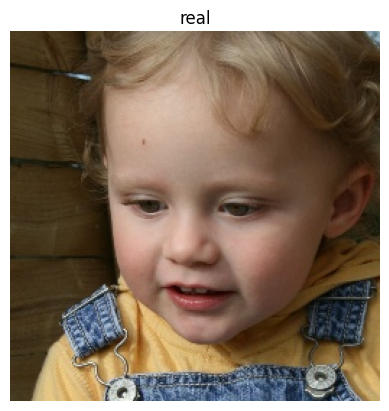

In [27]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + "/" + target_class
  print(f"target folder {target_folder}")
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

# View random image
img_real = view_random_image(target_dir=data_dir,target_class="real")

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(28, 28, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, 3, activation="relu"), #64는 feature map
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2) 사이즈를 줄이는 방법.
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(128, 3, activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, 3, activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(256, 3, activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(2, activation="softmax") # binary activation output
])

c:\Users\ksmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 0, 0, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 0, 0, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 0, 0, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 0)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281,474 (4.89 MB)

 Trainable params: 1,279,682 (4.88 MB)

 Non-trainable params: 1,792 (7.00 KB)